In [1]:
%pylab inline
import os
from glob import glob

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


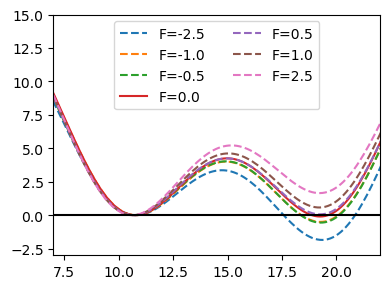

In [2]:
plt.figure(figsize=(4,3))

bias_factor = 10
center = 15
kT = 0.593 # kcal/mol
run_dirs = sorted( glob("run_F*"), key=lambda x: float(x.split('_F')[1]))
for run_dir in run_dirs:
    force = float(run_dir.split('_F')[1])
    #if force!=0: continue
    grid_file = glob(os.path.join(run_dir,'run*.grid'))[0]
    bias_data = np.loadtxt(grid_file)
    x_values = bias_data[:,0]
    fes = -(bias_factor-1)/bias_factor*bias_data[:,1]
    fes -= fes[x_values<center].min()
    if force==0:
        linestyle='-'
    else:
        linestyle='--'
    plt.plot(x_values,fes,label=f'F={force}',linestyle=linestyle)
plt.axhline(0,color='k')
plt.xlim(7,22)
plt.ylim(-3,15)
plt.legend(loc='upper center',ncol=2)
plt.tight_layout()
plt.savefig('double_well_pull_metad.jpg',dpi=72)